In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Cardiotocographic.csv')


print(f"Loaded DataFrame shape: {df.shape}")
print("Missing values count per column (before treatment):\n", df.isnull().sum())

Loaded DataFrame shape: (2126, 14)
Missing values count per column (before treatment):
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [3]:
print("\n--- Handling Missing Values ---")
for column in df.columns:
    if df[column].isnull().any():
        median_val = df[column].median()
        # Filling the NaN values in the column with its median
        df[column].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{column}' with median: {median_val:.4f}")

print("Total missing values after imputation:", df.isnull().sum().sum())


--- Handling Missing Values ---
Filled missing values in 'LB' with median: 133.0000
Filled missing values in 'AC' with median: 0.0016
Filled missing values in 'DS' with median: 0.0000
Filled missing values in 'DP' with median: 0.0000
Filled missing values in 'MLTV' with median: 7.4000
Filled missing values in 'Width' with median: 67.0000
Filled missing values in 'Tendency' with median: 0.0000
Filled missing values in 'NSP' with median: 1.0000
Total missing values after imputation: 0


/tmp/ipython-input-1047050938.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_val, inplace=True)


In [5]:
def winsorize_data(series):
    lower_bound = series.quantile(0.05)
    upper_bound = series.quantile(0.95)
    return series.clip(lower=lower_bound, upper=upper_bound)

In [6]:
df_cleaned = df.apply(winsorize_data)
print("Data successfully Winsorized.")

Data successfully Winsorized.


In [9]:
print("Summary Statistic")
summary_stats = pd.DataFrame()
for col in df_cleaned.columns:
    stats = {
        'Mean': df_cleaned[col].mean(),
        'Median': df_cleaned[col].median(),
        'Mode': df_cleaned[col].mode().iloc[0],
        'Variance': df_cleaned[col].var(),
        'Q1 (25th Perc.)': df_cleaned[col].quantile(0.25),
        'Q3 (75th Perc.)': df_cleaned[col].quantile(0.75)
    }

Summary Statistic


In [10]:
summary_stats[col] = pd.Series(stats)

print("Summary Statistics (Transposed):\n", summary_stats.transpose().to_markdown())

Summary Statistics (Transposed):
 |     |    Mean |   Median |   Mode |   Variance |   Q1 (25th Perc.) |   Q3 (75th Perc.) |
|:----|--------:|---------:|-------:|-----------:|------------------:|------------------:|
| NSP | 1.30355 |        1 |      1 |   0.376946 |                 1 |                 1 |


In [11]:
print(" Generating Visualizations")
key_vars = ['LB', 'ASTV', 'MLTV', 'Width']
sns.set_style("whitegrid")

 Generating Visualizations


In [18]:
plt.suptitle('Histograms of Key Cardiotocographic Variables', y=1.02)
plt.tight_layout()
plt.savefig('key_vars_histograms.png')
plt.close()
print("Histograms saved as 'key_vars_histograms.png'")

Histograms saved as 'key_vars_histograms.png'


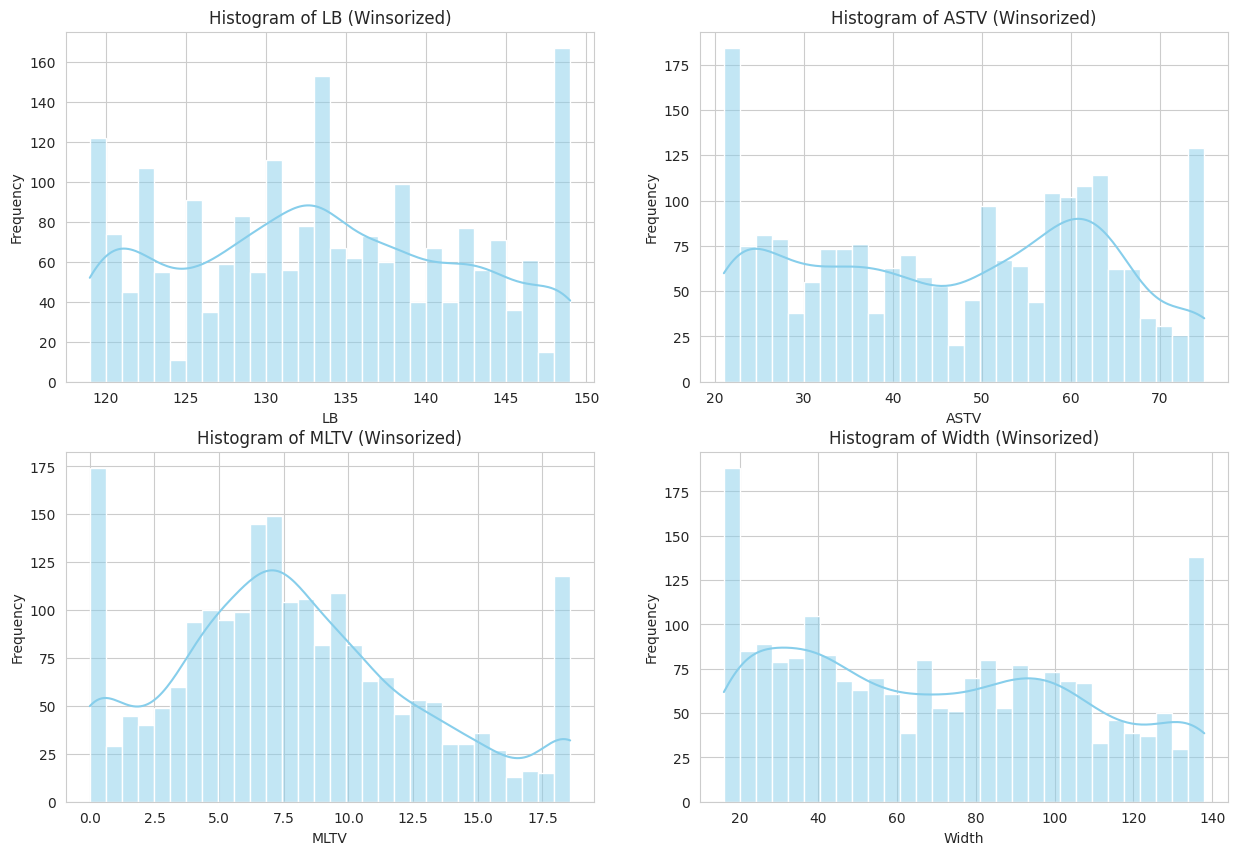

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_vars):
    plt.subplot(2, 2, i + 1)
    # Histogram with Kernel Density Estimate (KDE) line
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col} (Winsorized)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

Histograms saved as 'key_vars_histograms.png'


In [16]:
plt.suptitle('Boxplots of Key Cardiotocographic Variables', y=1.02)
plt.tight_layout()
plt.savefig('key_vars_boxplots.png')
plt.close()
print("Boxplots saved as 'key_vars_boxplots.png'")

Boxplots saved as 'key_vars_boxplots.png'


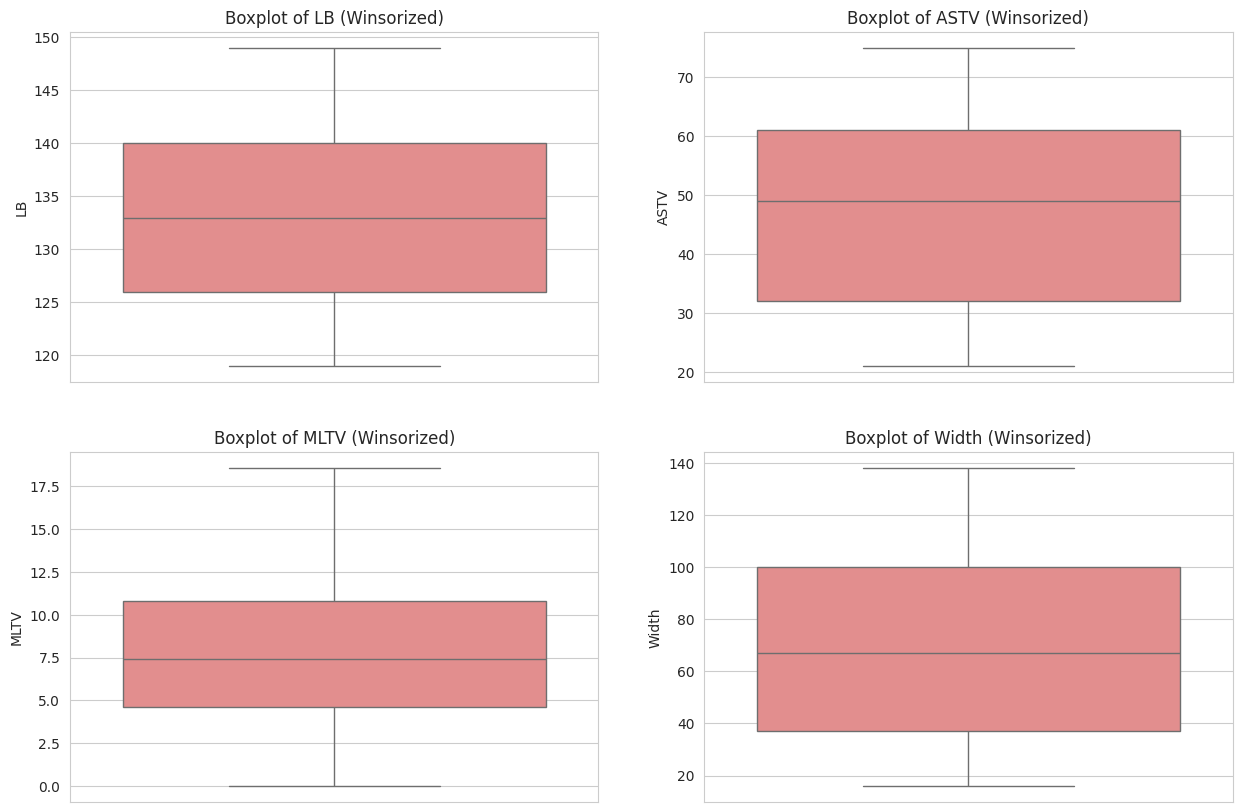

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_vars):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_cleaned[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (Winsorized)')
    plt.ylabel(col)

Boxplots saved as 'key_vars_boxplots.png'
